<a href="https://colab.research.google.com/github/MeetSable/lok-sabha-debates-analysis/blob/main/NER_tagging_and_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lok Sabha Debates Analysis
# NER tagging and visualization

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd /content/drive/Shareddrives/NLP_Project

/content/drive/Shareddrives/NLP_Project


## Imports

In [11]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

import os
from tqdm import tqdm
import pandas as pd
import json

import nltk
import spacy
from sklearn.feature_extraction.text import TfidfVectorizer

## Entity Class 
- keep track of entities and it's frequeince
- generate wordcloud and bargraph from any particular entity

In [5]:
class EntityData():
    def __init__(self, json_path = None):
        self.ent_dict = {}

        if json_path:
            self.load_json(json_path)

    def add_ent(self, ent):
        try:
            self.ent_dict[ent.label_][ent.text] += 1
        except:
            try:
                self.ent_dict[ent.label_][ent.text] = 1
            except:
                self.ent_dict[ent.label_] = {}
                self.ent_dict[ent.label_][ent.text] = 1

    def __getitem__(self, i):
        return self.ent_dict[i]
    
    def __len__(self):
        return len(self.ent_dict)
    
    def list_entites(self):
        return self.ent_dict.keys()
    
    def load_json(self, filepath):
        with open(filepath, 'r') as f:
            self.ent_dict = json.load(f)
    
    def save_json(self, filepath):
        with open(filepath, 'w') as f:
            json.dump(self.ent_dict, f, indent=4)
        
    def word_cloud(self, entity_name, figsize=(10,10)):
        plt.figure(figsize=figsize)
        plt.imshow(WordCloud(height = 800, width = 800).generate_from_frequencies(self.ent_dict[entity_name]))
        plt.axis('off')
        plt.show()
    
    def plot_top_n_ents(self, entity_name, n=10, figsize=(10,10)):
        ents = self.list_top_n_ents(entity_name, n)
        fig, ax = plt.subplots(figsize=figsize)
        ax.barh([w for w, f in reversed(ents)], [f for w, f in reversed(ents)])
        ax.spines['top'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.set_axisbelow(True)
        ax.xaxis.grid(True)
        plt.show()

    def list_top_n_ents(self,entity_name, n=10, reverse = True):
        ents = list(self.ent_dict[entity_name].items())
        ents = sorted(ents, key = lambda x: x[1], reverse=reverse)
        return ents[:n]

In [121]:
nlp = spacy.load('en_core_web_sm')
stopwords = nlp.Defaults.stop_words

folder_path = '/content/drive/Shareddrives/NLP_Project/Legislative Data/2002/csv'

filepaths = os.listdir(folder_path)

In [122]:
entities = EntityData()

for filename in tqdm(filepaths):
    filedata = pd.read_csv(os.path.join(folder_path, filename), index_col=0).to_numpy()
    for sent in filedata:
        doc = nlp(sent.item())
        for token in doc.ents:
            entities.add_ent(token)

100%|██████████| 85/85 [43:05<00:00, 30.42s/it]


In [6]:
entities = EntityData()
entities.load_json('/content/drive/Shareddrives/NLP_Project/Legislative Data/2002/entities.json')

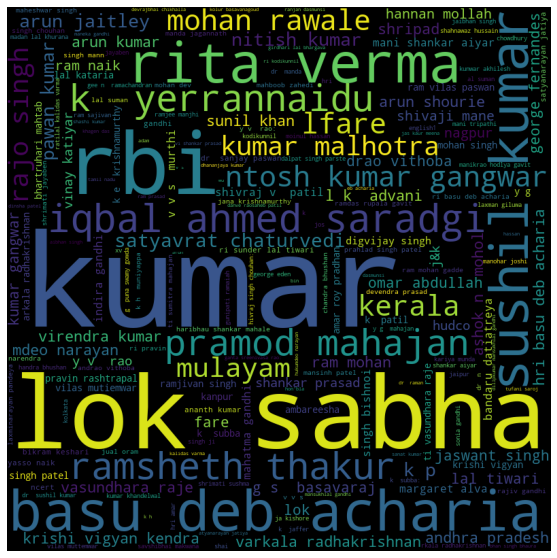

In [10]:
entities.word_cloud('PERSON')

In [ ]:
folder_path = path
year_data = []
for filename in tqdm(filepaths):
    filedata = pd.read_csv(os.path.join(folder_path, filename), index_col=0).to_string()
    year_data.append(filedata)

100%|██████████| 81/81 [00:06<00:00, 12.26it/s]


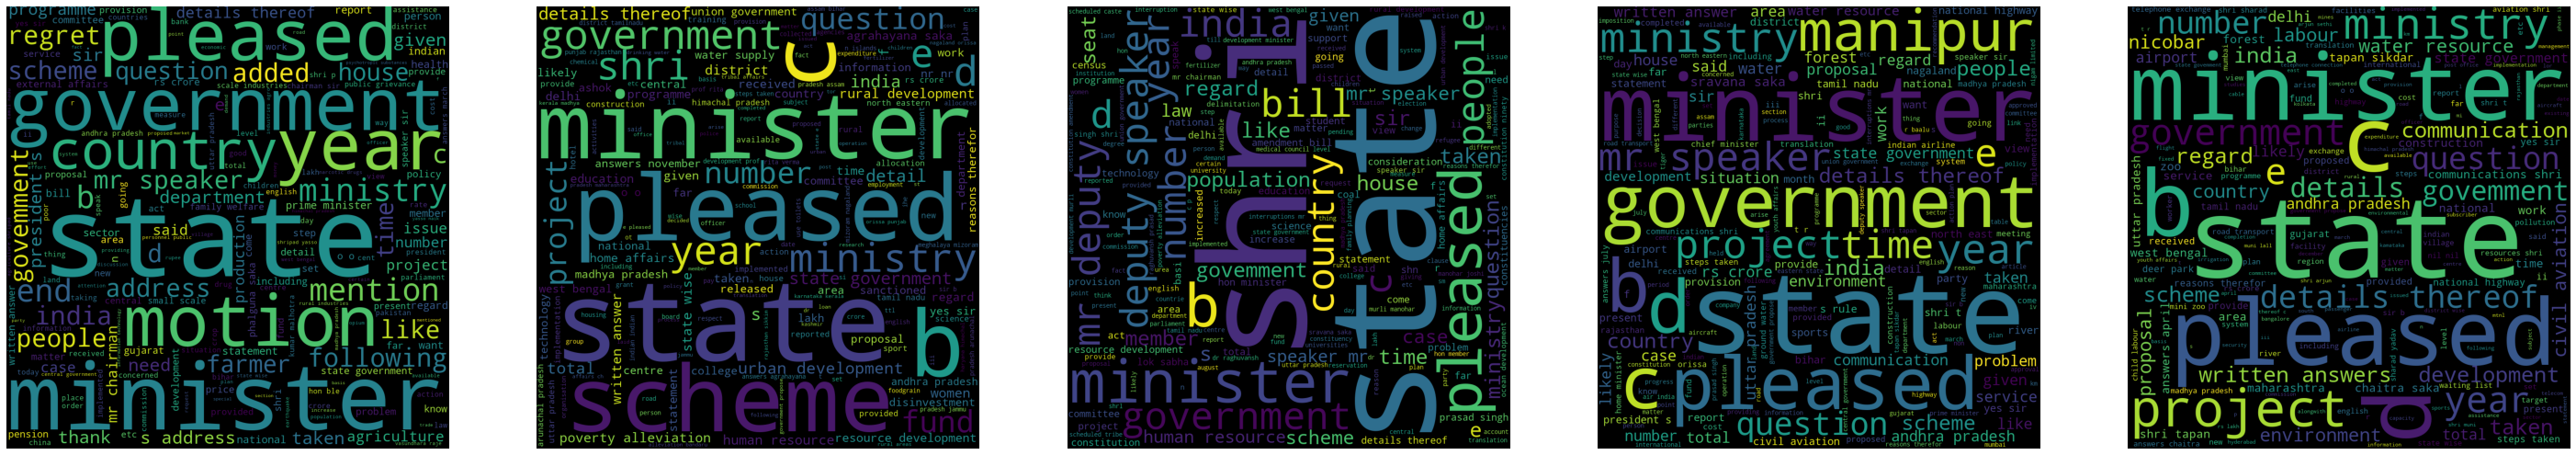

In [ ]:
fig, ax = plt.subplots(1, 5, figsize=(50, 25))
ax[0].imshow(WordCloud(height=1000, width=1000, stopwords=stopwords, regexp="\w+", repeat=True).generate(year_data[0]))
ax[0].axis('off')
ax[1].imshow(WordCloud(height=1000, width=1000, stopwords=stopwords, regexp="\w+", repeat=True).generate(year_data[15]))
ax[1].axis('off')
ax[2].imshow(WordCloud(height=1000, width=1000, stopwords=stopwords, regexp="\w+", repeat=True).generate(year_data[30]))
ax[2].axis('off')
ax[3].imshow(WordCloud(height=1000, width=1000, stopwords=stopwords, regexp="\w+", repeat=True).generate(year_data[45]))
ax[3].axis('off')
ax[4].imshow(WordCloud(height=1000, width=1000, stopwords=stopwords, regexp="\w+", repeat=True).generate(year_data[60]))
ax[4].axis('off')
plt.show()

In [12]:
entities = EntityData('/content/drive/Shareddrives/NLP_Project/Legislative Data/2001/entities.json')
entities.list_entites()

dict_keys(['PERSON', 'CARDINAL', 'ORG', 'GPE', 'NORP', 'ORDINAL', 'DATE', 'PRODUCT', 'TIME', 'QUANTITY', 'LANGUAGE', 'MONEY', 'PERCENT', 'LOC', 'EVENT', 'LAW', 'FAC', 'WORK_OF_ART'])

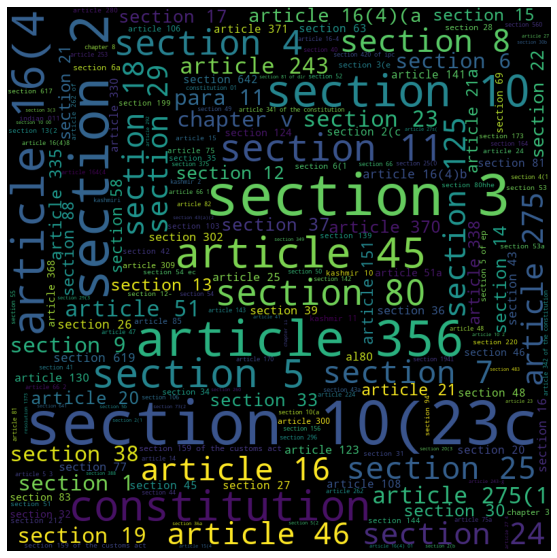

In [27]:
entities.word_cloud('LAW')

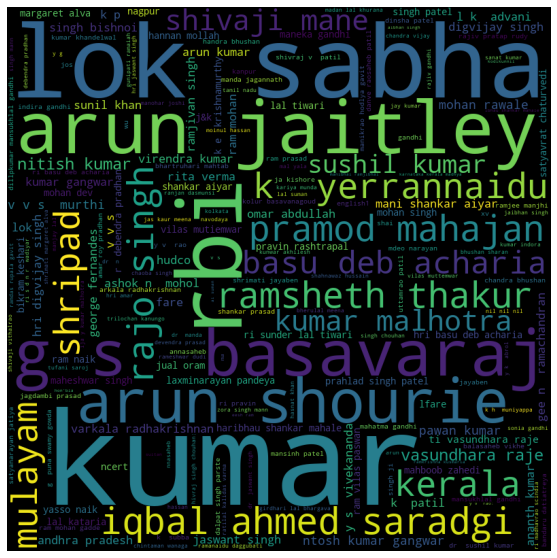

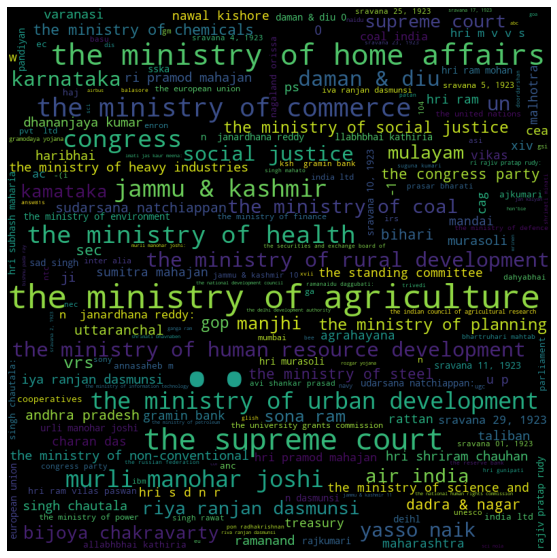

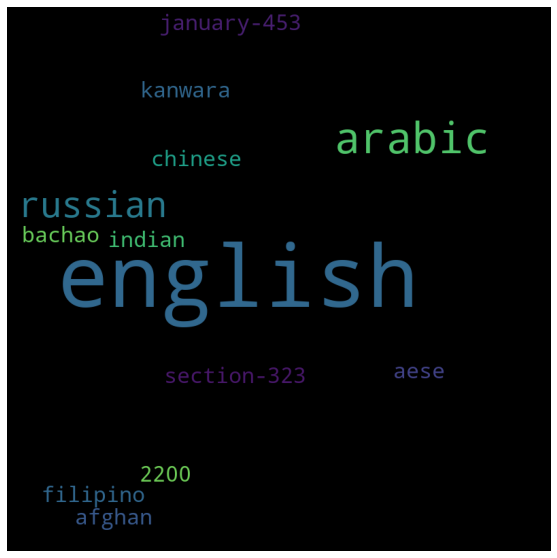

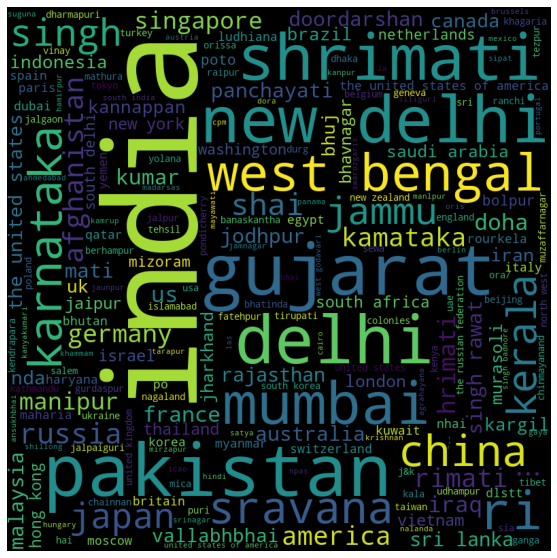

In [14]:
entities.word_cloud('PERSON')
entities.word_cloud('ORG')
entities.word_cloud('LANGUAGE')
entities.word_cloud('GPE')

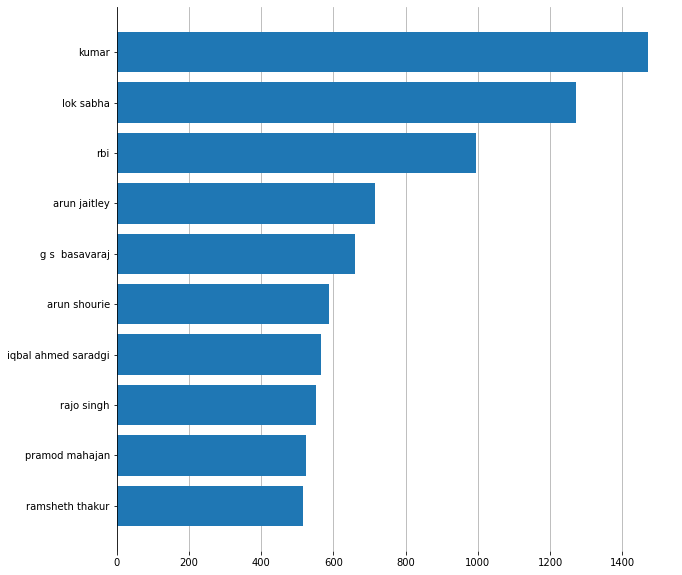

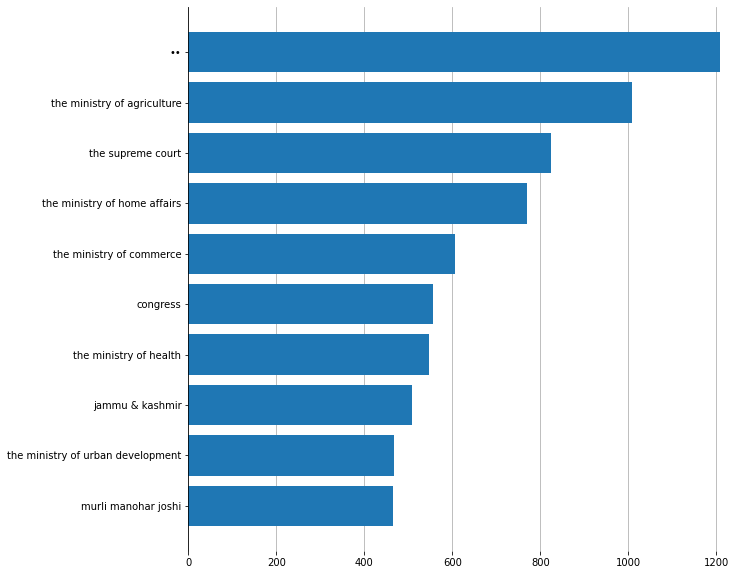

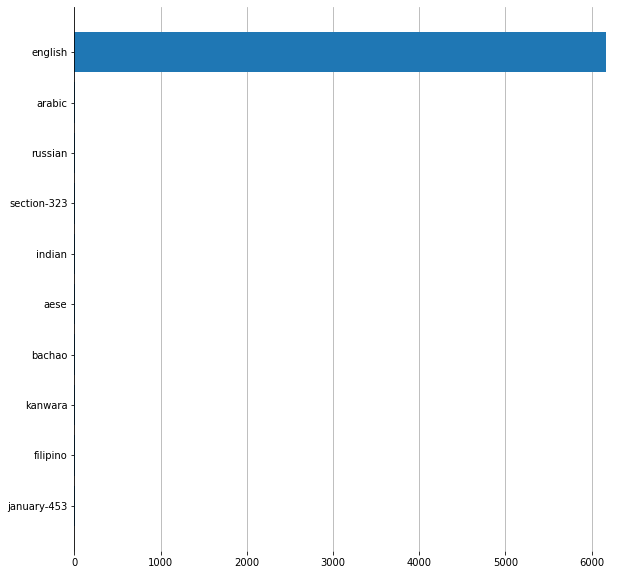

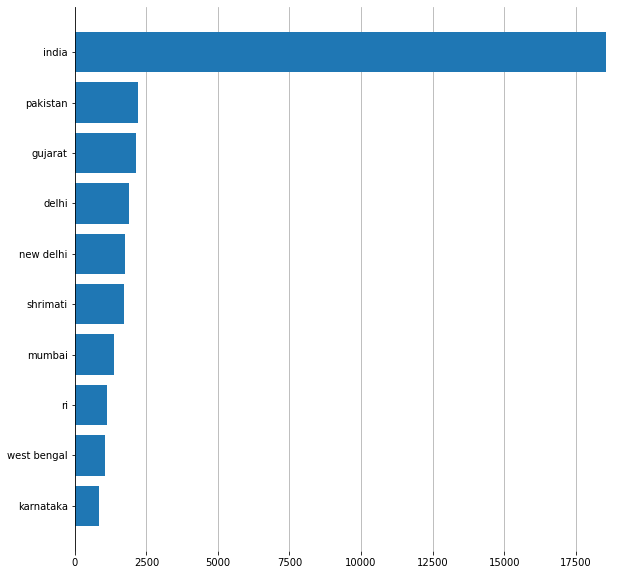

In [16]:
entities.plot_top_n_ents('PERSON')
entities.plot_top_n_ents('ORG')
entities.plot_top_n_ents('LANGUAGE')
entities.plot_top_n_ents('GPE')

In [17]:
entities.list_top_n_ents("LANGUAGE")

[('english', 6165),
 ('arabic', 6),
 ('russian', 4),
 ('section-323', 1),
 ('indian', 1),
 ('aese', 1),
 ('bachao', 1),
 ('kanwara', 1),
 ('filipino', 1),
 ('january-453', 1)]

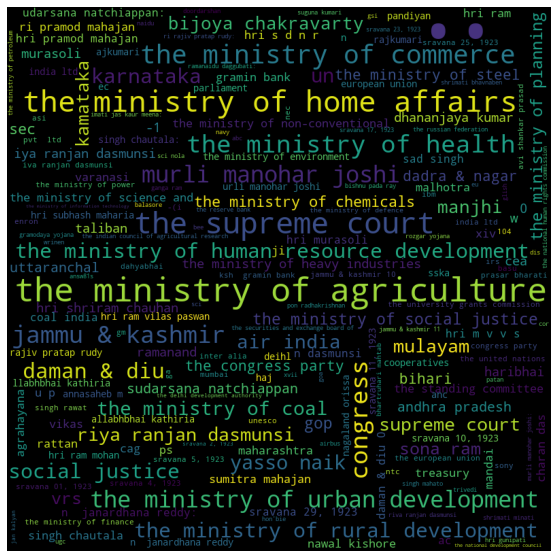

In [ ]:
entities.word_cloud('ORG')

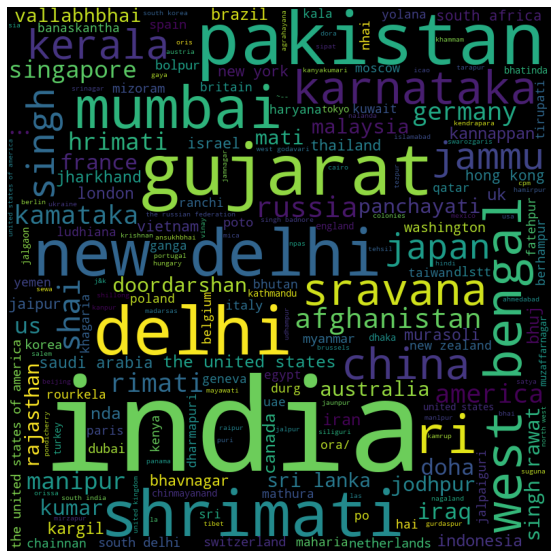

In [ ]:
entities.word_cloud('GPE')

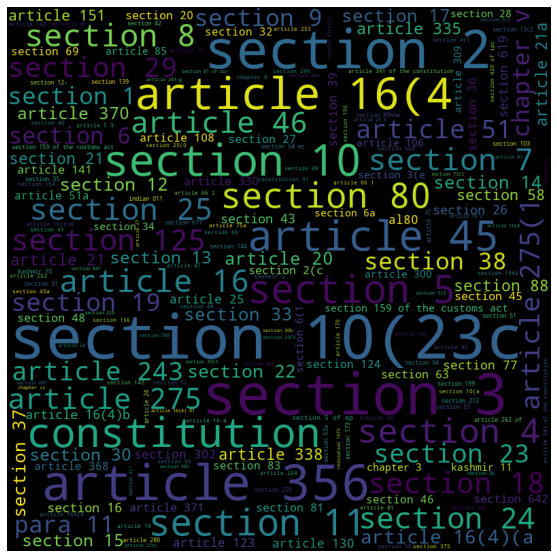

In [ ]:
entities.word_cloud('LAW')

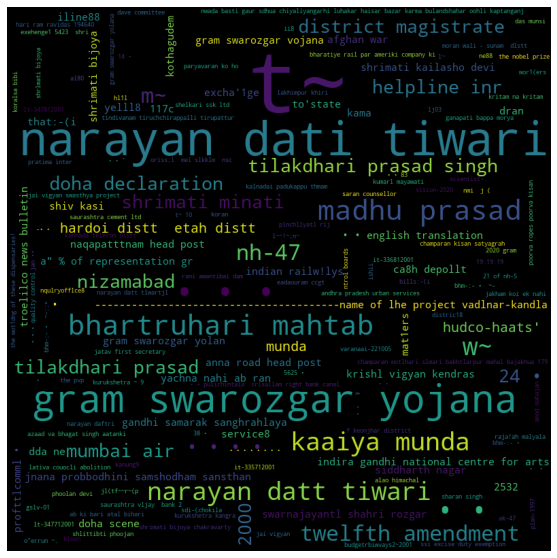

In [ ]:
entities.word_cloud('WORK_OF_ART')

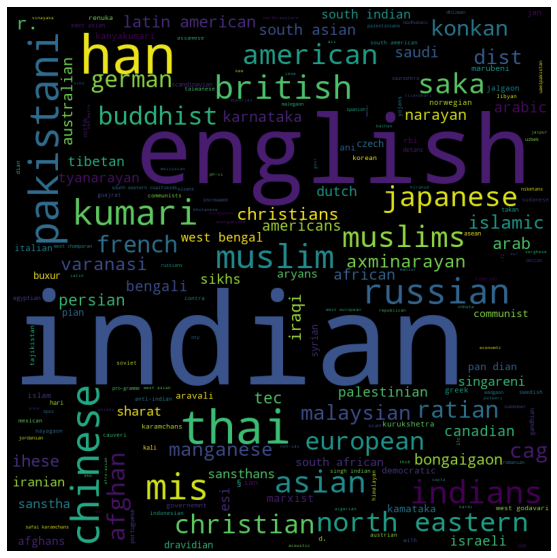

In [ ]:
entities.word_cloud('NORP')

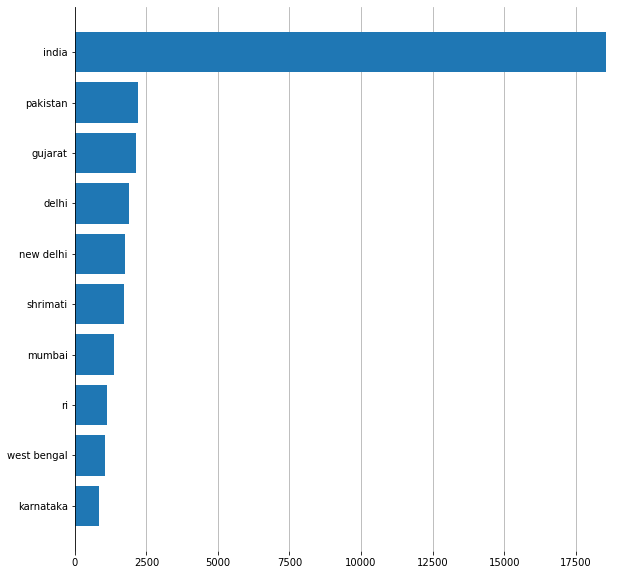

In [ ]:
top_w = entities.plot_top_n_ents('GPE', figsize=(10,10))

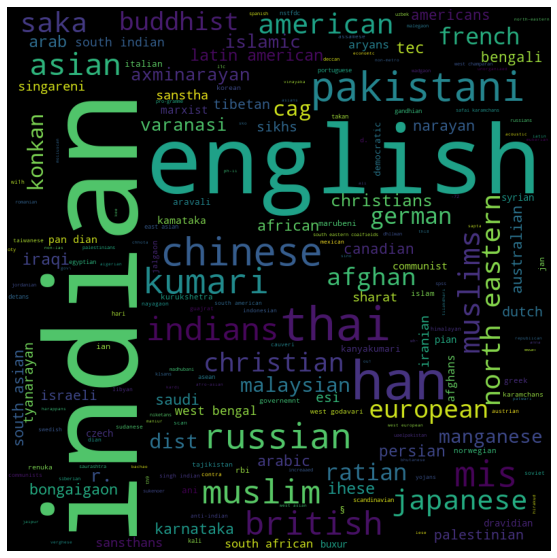

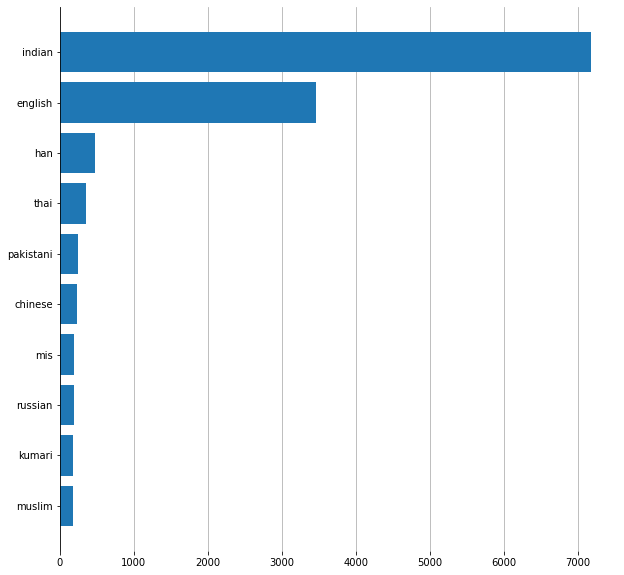

In [29]:
entities.word_cloud('NORP')
entities.plot_top_n_ents('NORP')